# Bipolar disorder and response to lithium: blood

Dataset Files: 
* gds5393.csv 
* meta-gds5393.csv

**Introdução**

O transtorno bipolar é uma condição mental caracterizada por episódios de humor altamente variáveis, com períodos de euforia ou mania (conhecidos como episódios maníacos) alternando com períodos de profunda depressão (conhecidos como episódios depressivos). O tratamento para o transtorno bipolar geralmente inclui terapia e medicação.

Um dos medicamentos mais comuns utilizados para tratar o transtorno bipolar é o lítio. O lítio é um mineral que atua como estabilizador de humor e é eficaz na prevenção de episódios maníacos e depressivos em pessoas com transtorno bipolar. Ele funciona ajudando a equilibrar os níveis de determinados químicos no cérebro chamados neurotransmissores, que são responsáveis por transmitir informações entre as células cerebrais.


**Sobre o conjunto de dados**

O [conjunto de dados](https://www.ncbi.nlm.nih.gov/sites/GDSbrowser?acc=GDS5393) contém 120 amostras e é referente à análise de sangue periférico de pacientes com transtorno bipolar antes e 1 mês após o tratamento com lítio. A resposta dos pacientes ao lítio foi avaliada após 6 meses. Os resultados identificam uma assinatura de expressão gênica para a resposta ao tratamento com lítio em pacientes com transtorno bipolar.

Pela análise da [documentação](https://www.ncbi.nlm.nih.gov/geo/tools/profileGraph.cgi?ID=GDS5393) do conjunto de dados verificamos o metadados contém as seguintes colunas:
* **sample**: (GSM1105…) - Identificador da amostra. Referente a 120 amostras da colheita de sangue.
* **agent**: (control ou lithium) - Indica se a amostra é de um indivíduo de controlo ou se foi submetido ao tratamento com lítio.
* **other**: (responder ou non-responder) - Identifica se a amostra é de um indivíduo que respondeu ou não ao tratamento.
* **time**: (baseline ou 1 month) - Indica o momento em que a amostra foi colhida.
* **individual**: Identificador único do indivíduo, que pode ser OPT_(N) para indivíduos de control e Li+OPT_(N) para indivíduos que receberam lítio. 
                  Cada indivíduo um tem duas amostras referentes ao momento da recolha (baseline e 1 month).
* **description**: Descrição adicional sobre cada amostra.

### Carregamento dos dados e metadados do dataset

In [1]:
# Importar bibliotecas necessárias para o processamento
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

# Ler dados usando a lib pandas
data = pd.read_csv("gds5393.csv", sep=',', index_col = 0)
meta = pd.read_csv("meta-gds5393.csv", sep=',', index_col = 0)

#### Preparação dos dados

In [2]:
# remover os genes que têm todos os valores como NaN (dados nulos), usando o parâmetro inplace = True para alterar directamente na variável data
data.dropna(inplace = True)

In [3]:
# fazer a transposta para termos os dados na forma de uma matriz de genes (nas colunas) e amostras (nas linhas)
data = data.transpose()

In [4]:
# Dimensão dos dados
data.values.shape

(120, 47323)

## Estratégias de filtragem dos dados

- **Por variabilidade**

O VarianceThreshold é uma técnica que é baseada na variação dos dados. 
O objetivo é remover as features que têm uma variação baixa, o que é útil para remover dados irrelevantes ou redundantes e melhorar a performance do modelo.

In [5]:
# Remover genes que variam pouco preservando as features com maior variabilidade
threshold = 0.01

from sklearn.feature_selection import VarianceThreshold

# Remover todas as colunas (genes) que possuem pouco variabilidade
var_threshold = VarianceThreshold(threshold=threshold)
x_variance = var_threshold.fit_transform(data)

# Obter os índices das colunas com alta variância
variance_columns = data.columns[var_threshold.get_support()]

# Criar um novo dataframe apenas com as colunas de maior variância
high_variance_data = data[variance_columns]
print("Features com maior variância:\n", high_variance_data.shape)
high_variance_data.head()

Features com maior variância:
 (120, 22164)


,ILMN_1343291,ILMN_1343295,ILMN_1651209,ILMN_1651228,ILMN_1651229,ILMN_1651254,ILMN_1651259,ILMN_1651262,ILMN_1651278,ILMN_1651281,...,ILMN_3310920,ILMN_3310970,ILMN_3310980,ILMN_3311000,ILMN_3311015,ILMN_3311070,ILMN_3311075,ILMN_3311135,ILMN_3311165,ILMN_3311190
GSM1105438,14.8983,12.1027,6.97636,11.9813,7.94897,11.0550,7.03599,10.0687,8.13267,6.74907,...,6.99507,7.26819,6.94634,6.72470,6.87704,7.08883,6.88395,6.84189,7.12904,7.81762
GSM1105486,14.7170,12.4403,7.16577,12.9543,7.86514,10.6915,7.08843,10.6607,8.32905,6.71579,...,6.92025,6.98889,6.94585,6.85257,7.01848,6.83125,7.02439,6.84664,6.92715,7.55871
GSM1105487,14.8411,12.4878,7.23598,12.9664,8.50659,10.8124,7.22951,10.1462,7.90606,6.69464,...,7.01741,7.02381,6.88330,6.87599,6.71131,6.90434,6.85434,6.73200,7.20899,7.69129
GSM1105490,14.9191,11.6591,7.20855,13.4400,7.85840,10.4861,6.99612,10.4911,8.41232,6.81911,...,6.86554,7.01748,6.94159,6.83904,6.94615,7.30635,6.88281,7.02354,7.18966,7.32495
GSM1105491,14.7371,11.9833,7.17747,12.9282,7.71051,10.9352,7.02428,10.0324,7.94832,6.90273,...,7.13600,7.19909,6.80761,6.74730,6.96721,6.85139,6.95586,6.96421,7.23281,7.90085


- **Por testes estatísticos univariados**

**SelectKBest**

O SelectKBest é uma estratégia de filtragem que seleciona os k melhores recursos (ou colunas) de um conjunto de dados, de forma a manter apenas os mais relevantes. 
O SelectKBest avalia cada recurso individualmente utilizando uma métrica escolhida (como a importância F-value) e seleciona os k recursos com as maiores pontuações.

In [6]:
from sklearn.feature_selection import SelectKBest, f_classif

# Selecionar os 10 melhores genes, usando f_classif (ANOVA F-value between label/feature for classification tasks)
skb = SelectKBest(f_classif, k=10)

# fit and transform data
labels = data.iloc[:,0]
x_kbest = skb.fit_transform(data.iloc[:,1:], labels)

# Obter o nome das colunas selecionadas
kbest_columns = data[skb.get_feature_names_out()]

# Criar um DataFrame resultante de x_kbest mantendo o nome das colunas e indices
data_kbest = pd.DataFrame(data=x_kbest, index=data.index, columns=kbest_columns.columns)
print(data_kbest.shape)
data_kbest.head()

(120, 10)


,ILMN_1669208,ILMN_1680435,ILMN_1722603,ILMN_1795356,ILMN_1801428,ILMN_1801769,ILMN_1864228,ILMN_2115534,ILMN_2179018,ILMN_2331501
GSM1105438,6.92317,7.18248,6.71232,6.85849,6.77757,6.76613,7.06989,6.78824,9.31056,14.9082
GSM1105486,6.82055,7.12180,6.81113,6.87268,6.63592,6.77801,7.00357,7.11131,10.11210,14.9082
GSM1105487,7.15070,7.24666,6.65014,6.86715,6.76708,6.86820,7.22832,6.99260,10.39390,14.9522
GSM1105490,6.84683,7.09110,6.65142,6.88523,6.66969,6.75132,6.88630,6.95294,10.16470,14.8983
GSM1105491,7.33096,6.92369,6.76451,6.91245,6.72857,6.83683,7.04353,7.02654,9.69256,14.9766


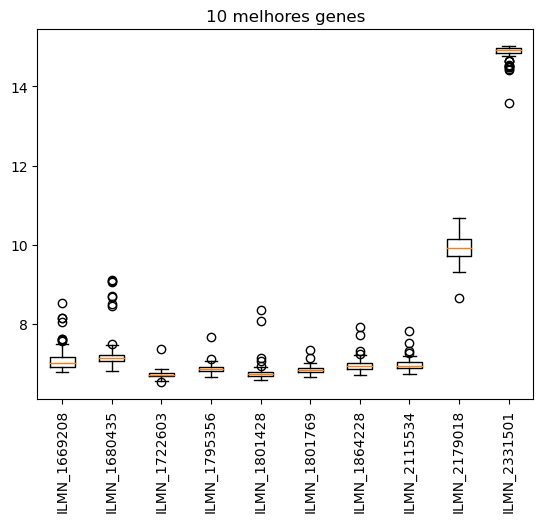

In [7]:
import matplotlib.pyplot as plt

# Criar o boxplot dos dados selecionados com os 10 melhores genes
plt.boxplot(data_kbest)
plt.title('10 melhores genes')
plt.xticks(np.arange(1, 11), data_kbest.columns, rotation=90)
plt.show()

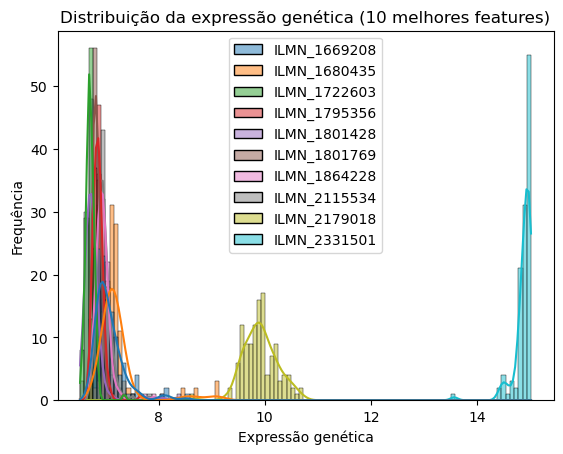

In [8]:
import seaborn as sns

# Criar histogramas dos dados 
sns.histplot(data_kbest, kde=True)
plt.xlabel('Expressão genética')
plt.ylabel('Frequência')
plt.title('Distribuição da expressão genética (10 melhores features)')
plt.show()

**SelectPercentile**

O SelectPercentile é uma técnica de seleção de características que permite selecionar as características mais relevantes com base numa medida de importância, como o f_classif (ANOVA F-value entre classes/features para tarefas de classificação).

In [9]:
from sklearn.feature_selection import SelectPercentile, f_classif

# Selecionar as melhores colunas usando f_classif (ANOVA F-value between label/feature for classification tasks)
selector = SelectPercentile(f_classif, percentile=25)

# fit and transform data
labels = data.iloc[:,0]
x_best = selector.fit_transform(data.iloc[:,1:], labels)

# Obter o nome das colunas selecionadas
best_columns = data[selector.get_feature_names_out()]

# Criar um DataFrame resultante de x_best mantendo o nome das colunas e indices
data_best = pd.DataFrame(data=x_best, index=data.index, columns=best_columns.columns)
print(data_best.shape)
data_best.head()


(120, 11831)


,ILMN_1651229,ILMN_1651235,ILMN_1651237,ILMN_1651278,ILMN_1651329,ILMN_1651330,ILMN_1651339,ILMN_1651347,ILMN_1651351,ILMN_1651358,...,ILMN_3310925,ILMN_3310935,ILMN_3311005,ILMN_3311010,ILMN_3311100,ILMN_3311135,ILMN_3311140,ILMN_3311170,ILMN_3311175,ILMN_3311180
GSM1105438,7.94897,6.84083,6.67746,8.13267,6.95606,6.55813,6.87323,10.32320,6.78123,6.68912,...,7.01181,6.73890,7.00779,6.81024,6.84367,6.84189,6.65665,6.77274,6.85770,7.08213
GSM1105486,7.86514,6.90360,6.96924,8.32905,6.88453,6.58045,6.84578,10.22550,6.68985,6.72440,...,6.81231,6.88561,7.02933,6.81614,6.89522,6.84664,6.89849,6.78293,6.81344,6.85598
GSM1105487,8.50659,6.83799,6.74935,7.90606,6.81956,6.73977,6.86671,9.53867,6.77842,6.63179,...,6.85348,6.83455,6.84190,6.65386,6.95222,6.73200,6.69384,6.73403,6.69688,6.96195
GSM1105490,7.85840,6.79428,6.82034,8.41232,6.87126,6.56288,6.84748,10.59150,6.73818,6.65293,...,6.74182,6.79763,6.98149,6.80461,6.78327,7.02354,6.83174,6.85946,6.69968,6.99962
GSM1105491,7.71051,6.81236,6.75114,7.94832,7.15862,6.64993,7.03876,9.89505,6.90479,6.74497,...,6.89499,6.71579,6.77617,6.95283,6.81712,6.96421,6.68994,6.87367,6.68000,6.88795


**Separação das amostras de baseline e 1 mês**

Vamos fazer a separação das amostras de baseline e 1 mês para uma melhor análise das diferenças entre as amostras de "baseline" e "1 Month".
Dado que não temos uma métrica que define a importância das características para a tarefa de classificação e pretendemos remover dados irrelevantes, vamos usar o filtro utilizando VarianceThreshold para remover dados irrelevantes.

In [10]:
# separação dos dados com a colheita de sangue inicial e 1 mês depois
meta_baseline = meta.query("time == 'baseline'")
data_baseline = high_variance_data.loc[meta_baseline.index,:]

meta_oneMonth = meta.query("time == '1 month'")
data_oneMonth = high_variance_data.loc[meta_oneMonth.index,:]

## Análise multivariada não supervisionada

A análise multivariada não supervisionada é utilizada para descobrir relações e padrões em grandes conjuntos de dados, para identificar grupos ou clusters de observações similares e para visualizar dados de forma mais clara e intuitiva. 
Neste estudo vamos utilizar as técnicas de análise de componentes principais (PCA) e análise de cluster. 

In [11]:
# pre-processamento: standardizacao dos dados
from sklearn import preprocessing

# re-escalonamento dos valores para ficarem dentro de limites normalizados 
# (distribuição normal com média 0 e variância 1) em cada variável
print("Baseline")
data_baseline_scaled = preprocessing.scale(data_baseline.values)
print("Media: ", data_baseline_scaled.mean())
print("Desvio padrao: ", data_baseline_scaled.std())
data_baseline_scaled = pd.DataFrame(data_baseline_scaled, columns=data_baseline.columns, index=data_baseline.index)

print("\n1 Month")
data_oneMonth_scaled = preprocessing.scale(data_oneMonth.values)
print("Media: ", data_oneMonth_scaled.mean())
print("Desvio padrao: ", data_oneMonth_scaled.std())
data_oneMonth_scaled = pd.DataFrame(data_oneMonth_scaled, columns=data_oneMonth.columns, index=data_oneMonth.index)

Baseline
Media:  6.274900656294454e-17
Desvio padrao:  1.0000000000000002

1 Month
Media:  1.2430116558926616e-16
Desvio padrao:  1.0000000000000002


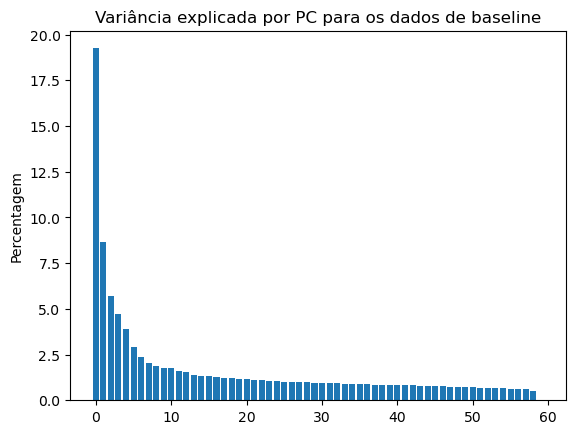

São necessários 45 componentes para explicar 90% da variabilidade dos dados.


In [12]:
from sklearn.decomposition import PCA
# Redução de dimensionalidade
# número de componentes para manter
n_components = 60
baseline_pca = PCA(n_components=n_components)

# Ajustar o PCA aos dados escalados
baseline_pca.fit(data_baseline_scaled)
# Transformar os dados usando as componentes principais
x_baseline_reduced = baseline_pca.transform(data_baseline_scaled)

plt.bar(range(n_components), baseline_pca.explained_variance_ratio_*100)
plt.title("Variância explicada por PC para os dados de baseline")
plt.ylabel("Percentagem")
plt.show()

# determinar o número de componentes principais necessários para explicar 90% da variabilidade dos dados
explained_variance = np.cumsum(baseline_pca.explained_variance_ratio_)
n_components = np.where(explained_variance >= 0.90)[0][0] + 1
print(f'São necessários {n_components} componentes para explicar 90% da variabilidade dos dados.')

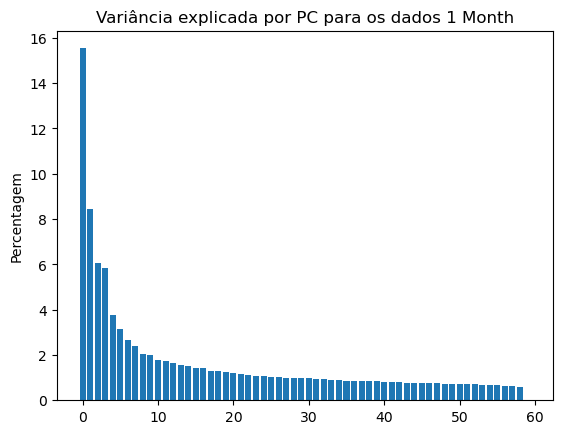

São necessários 45 componentes para explicar 90% da variabilidade dos dados.


In [13]:
from sklearn.decomposition import PCA
# Redução de dimensionalidade
# número de componentes para manter
n_components = 60
oneMonth_pca = PCA(n_components=n_components)

# Ajustar o PCA aos dados escalados
oneMonth_pca.fit(data_oneMonth_scaled)
# Transformar os dados usando as componentes principais
x_oneMonth_reduced = oneMonth_pca.transform(data_oneMonth_scaled)

plt.bar(range(n_components), oneMonth_pca.explained_variance_ratio_*100)
plt.title("Variância explicada por PC para os dados 1 Month")
plt.ylabel("Percentagem")
plt.show()

# determinar o número de componentes principais necessários para explicar 90% da variabilidade dos dados
explained_variance = np.cumsum(oneMonth_pca.explained_variance_ratio_)
n_components = np.where(explained_variance >= 0.90)[0][0] + 1
print(f'São necessários {n_components} componentes para explicar 90% da variabilidade dos dados.')

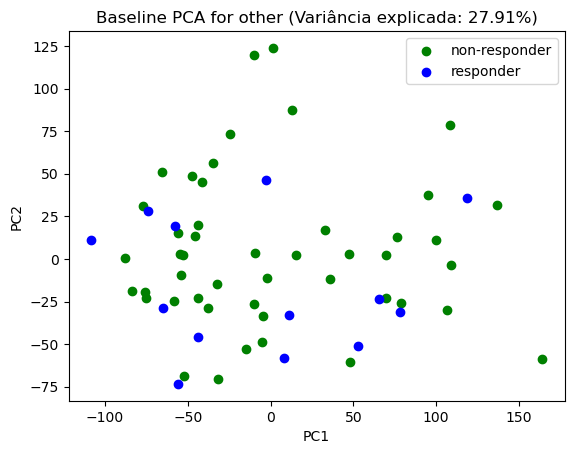

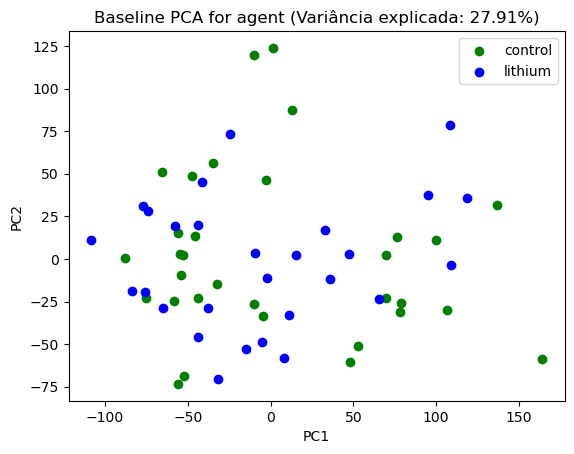

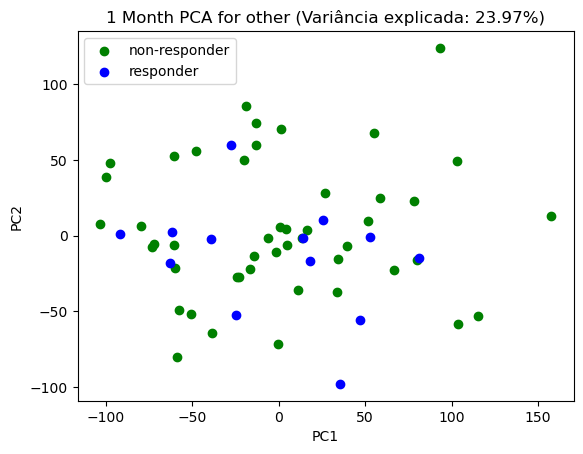

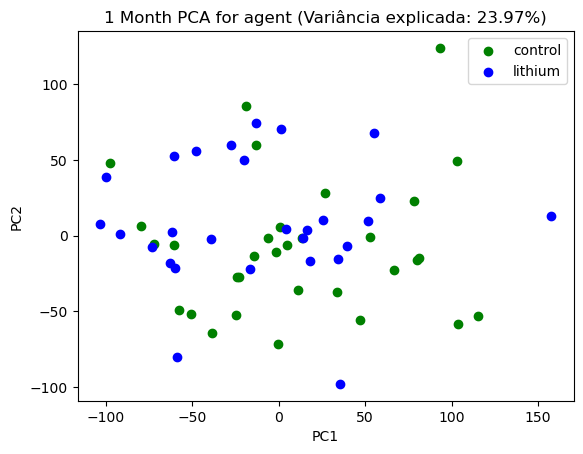

In [14]:
# Desenhar um gráfico scatter para cada uma das classes ('other' e 'agent') para os dois principais componentes (PC1 + PC2)
n_components = 2
def drawPlot(x_reduced, meta, pca, title):
    explained_variance = pca.explained_variance_ratio_[:n_components].sum()
    for class_name in ['other','agent']:
        output_data = meta[class_name].values
        plt.figure()
        for c, name in zip("gb", meta[class_name].unique()):
            plt.scatter(x_reduced[output_data == name, 0], x_reduced[output_data == name, 1], c=c, label=name)
        plt.legend()
        plt.title(title + ' PCA for '+ class_name + ' (Variância explicada: {:.2f}%)'.format(explained_variance*100))
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.show()

drawPlot(x_baseline_reduced, meta_baseline, baseline_pca, 'Baseline')
drawPlot(x_oneMonth_reduced, meta_oneMonth, oneMonth_pca, '1 Month')

Os dois primeiros componentes explicam cerca de 27.91% e 23.97% da variância total dos dados de "baseline" e "1 Month", respectivamente. Isto significa que estes dois componentes capturam uma boa parte da variação dos dados, mas ainda assim é muito baixa, como vimos em cima seriam necessários 45 componentes para explicar 90% dos dados. 
Assim sendo, não conseguimos sobre-interpretar os gráficos apenas com base nestes dois componentes.

**Clustering hierarquico dos dados**

A distância Euclidiana é uma medida de distância comum e é frequentemente usada em análises de dados multivariados, como no caso deste dataset de análise de amostras de sangue. Nesse sentido vamos fazer um dendograma utilizando a distância Euclidiana e com o método "ward" que minimiza a variação entre os clusters formados a cada iteração.

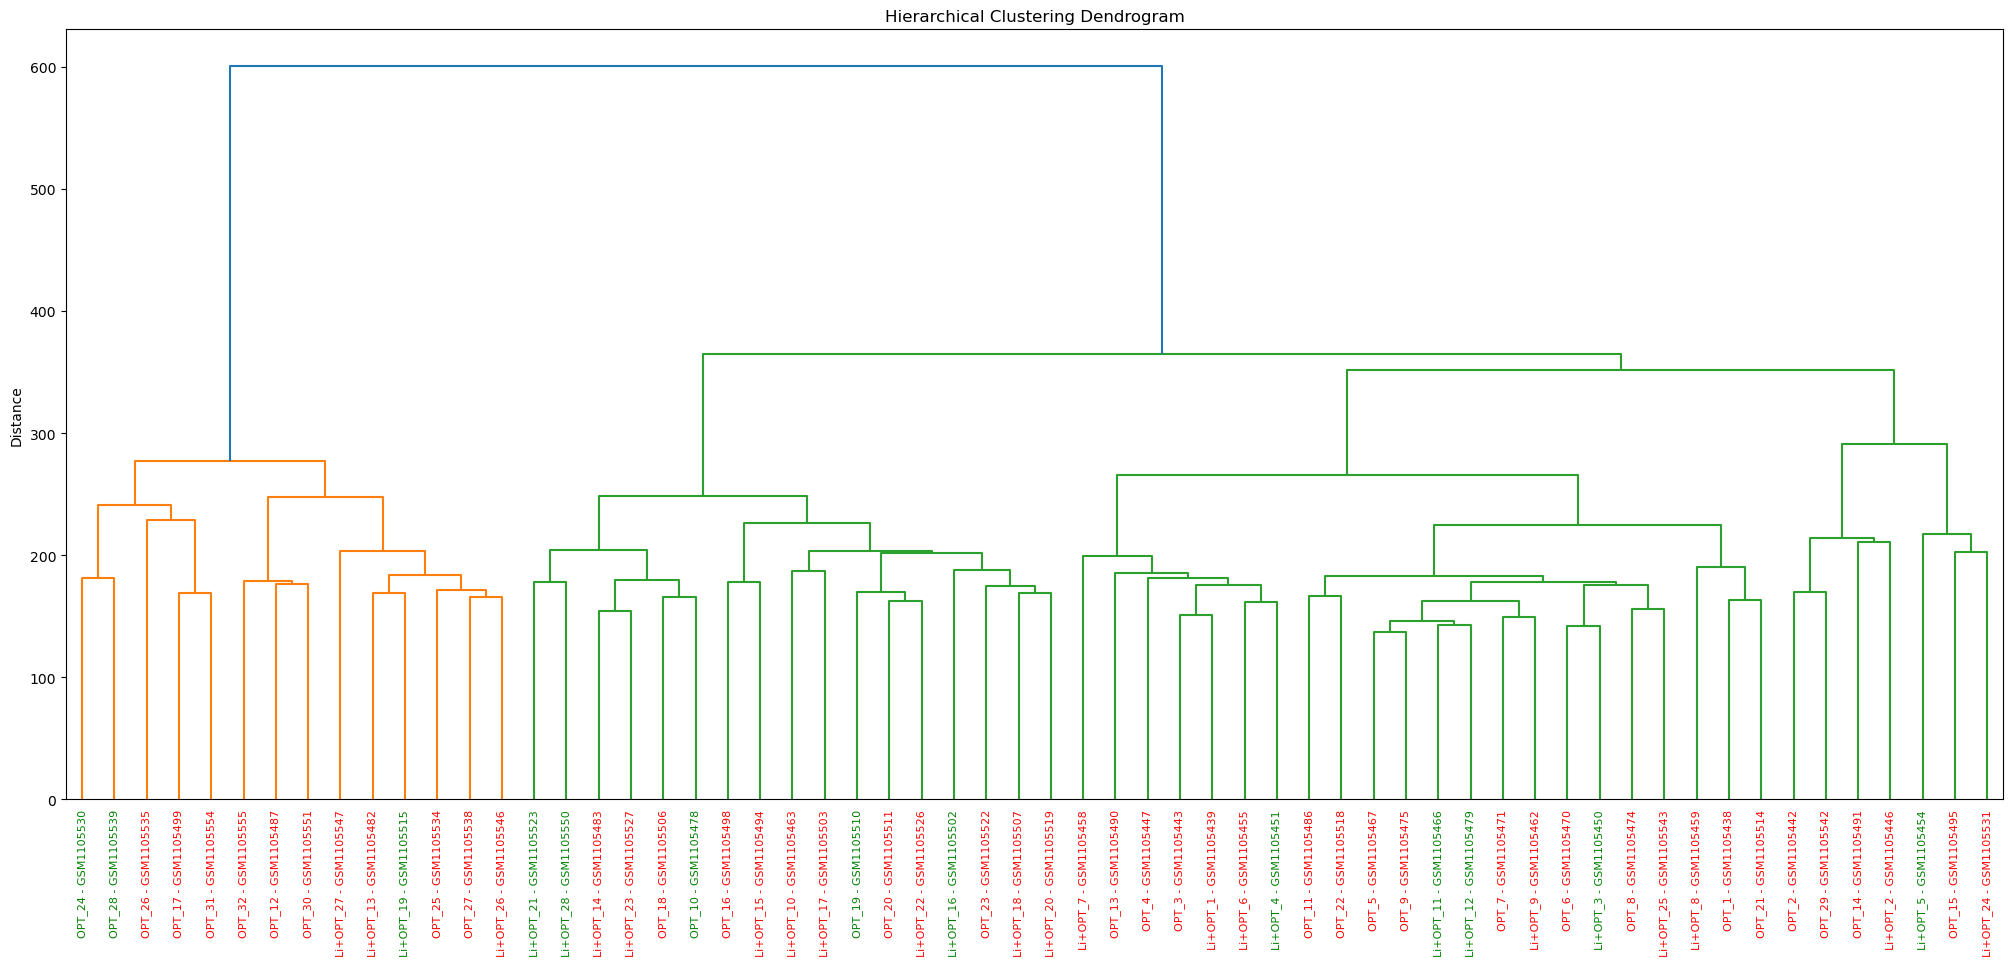

In [15]:
classe = 'other'

Z = linkage(data_baseline_scaled, method="ward")

# calculate full dendrogram
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels = [f"{ind} - {sample}" for sample, ind in zip(meta_baseline.index.values, meta_baseline['individual'].values)],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Distance')

# Assignment of colors to labels: 'r' is red, 'g' is green, etc.
label_colors = {'non-responder': 'r', 'responder': 'g'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    label = lbl.get_text().split(" - ")[1]
    color = label_colors[meta_baseline.loc[label, classe]]
    lbl.set_color(color)
plt.show()

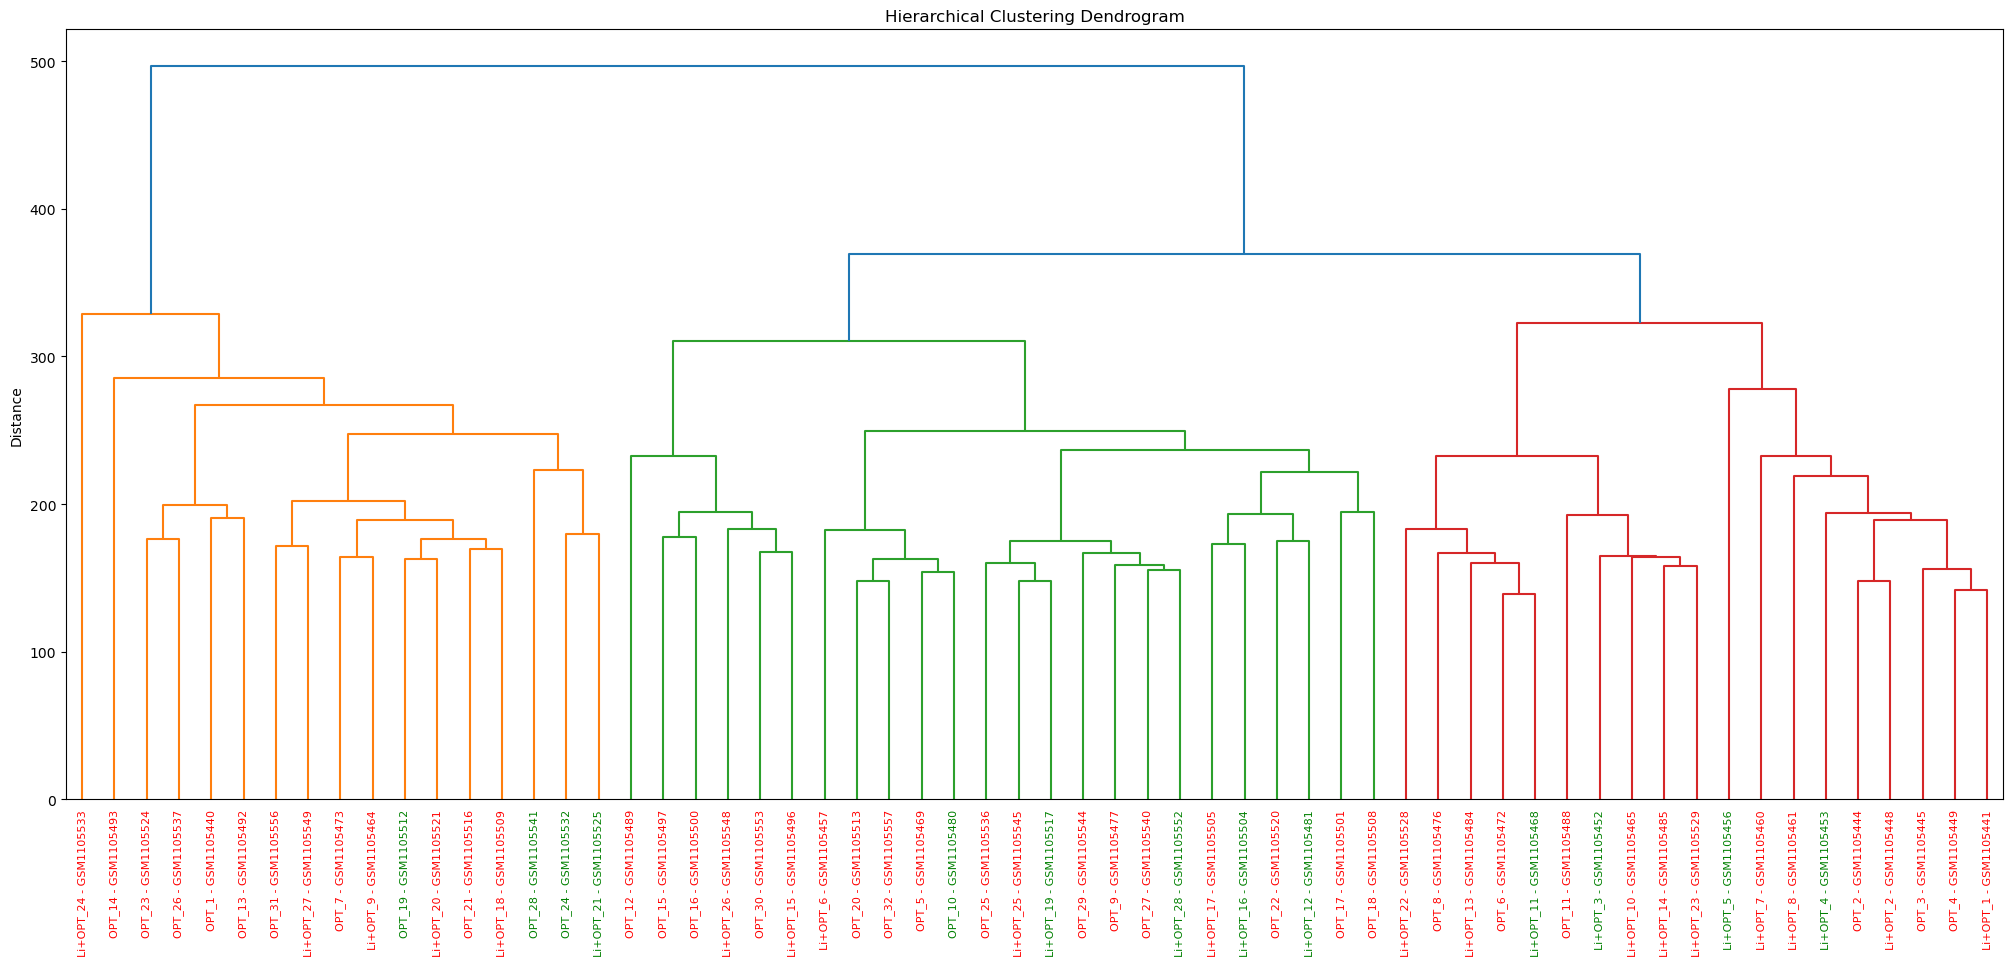

In [16]:
classe = 'other'

Z = linkage(data_oneMonth_scaled, method="ward")

# calculate full dendrogram
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels = [f"{ind} - {sample}" for sample, ind in zip(meta_oneMonth.index.values, meta_oneMonth['individual'].values)],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Distance')

# Assignment of colors to labels: 'r' is red, 'g' is green, etc.
label_colors = {'non-responder': 'r', 'responder': 'g'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    label = lbl.get_text().split(" - ")[1]
    color = label_colors[meta_oneMonth.loc[label, classe]]
    lbl.set_color(color)
plt.show()

In [17]:
# clustering hierarquico
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

k=3
hclust_b = AgglomerativeClustering(n_clusters=k, affinity="euclidean", linkage="ward")
hclust_b.fit(data_baseline_scaled)

output_b = meta_baseline[classe].values
res_hc_b = hclust_b.labels_
print("Baseline")
print(pd.crosstab(output_b, res_hc_b))

hclust_m = AgglomerativeClustering(n_clusters=k, affinity="euclidean", linkage="ward")
hclust_m.fit(data_oneMonth_scaled)

output_m = meta_oneMonth[classe].values
res_hc_m = hclust_m.labels_
print("\n1 Month")
print(pd.crosstab(output_m, res_hc_m))

Baseline
col_0           0   1   2
row_0                    
non-responder  24  11  12
responder       5   3   5

1 Month
col_0           0   1   2
row_0                    
non-responder  13  15  19
responder       4   4   5


Com base nestes resultados, é possível concluir que o modelo de clustering hierárquico está a capturar alguma informação sobre as diferenças entre os dados de baseline e 1 mês. É possível observar que, após um mês de tratamento com litio, houve uma mudança na distribuição dos pacientes entre os clusters. Alguns pacientes mudaram de cluster, e outros foram adicionados a novos clusters.

**Clustering k-means**

In [21]:
from sklearn.cluster import KMeans
import pandas as pd

# clustering k-means aos dados do baseline
k = 3
kmeans = KMeans(n_clusters=k, max_iter=1000)
kmeans.fit(data_baseline_scaled)
print("Baseline")
print(pd.crosstab(kmeans.labels_, meta_baseline[classe], rownames=['clusters'] ))

# clustering k-means aos dados oneMonth
kmeans = KMeans(n_clusters=k, max_iter=1000)
kmeans.fit(data_oneMonth_scaled)
print("\n1 Month")
print(pd.crosstab(kmeans.labels_, meta_oneMonth[classe], rownames=['clusters'] ))

Baseline
other     non-responder  responder
clusters                          
0                    26          8
1                    14          4
2                     7          1

1 Month
other     non-responder  responder
clusters                          
0                     7          1
1                    20          5
2                    20          7


Podemos ver que a distribuição de indivíduos em cada cluster muda entre o baseline e um mês depois. 

No entanto, observamos que sempre que corremos o K-Means obtemos valores diferentes, isto deve-se ao facto de o K-Means ser um algoritmo de clustering baseado em algoritmos probabilísticos, o que significa que o resultado do clustering pode variar em cada execução, mesmo com o mesmo conjunto de dados. Isto ocorre porque o K-Means inicia as centroides (pontos que representam os clusters) de forma aleatória. Se as centroides são inicializadas de forma diferente, o resultado final do clustering pode ser diferente.

**Análise das diferenças genéticas dos 10 melhores genes após 1 mês, comparativamente com baseline**

In [ ]:
# Selecionar os 10 melhores genes, usando f_classif (ANOVA F-value between label/feature for classification tasks)
skb = SelectKBest(f_classif, k=10)

# fit and transform data
labels = high_variance_data.iloc[:,0]
x_kbest = skb.fit_transform(high_variance_data.iloc[:,1:], labels)

# Obter o nome das colunas selecionadas
kbest_columns = data[skb.get_feature_names_out()]

# Criar um DataFrame resultante de x_kbest mantendo o nome das colunas e indices
data_kbest = pd.DataFrame(data=x_kbest, index=variance_data.index, columns=kbest_columns.columns)
print(data_kbest.shape)
data_kbest.head()


fig, ax = plt.subplots(1,2, figsize=(20, 5))
# Boxplot para os dados de baseline
ax[0].boxplot(data_baseline_scaled[data_kbest.columns])
ax[0].set_title('Baseline')
ax[0].set_xticklabels(data_kbest.columns, rotation=90)

# Boxplot para os dados de 1 mês
ax[1].boxplot(data_oneMonth_scaled[data_kbest.columns])
ax[1].set_title('1 Month')
ax[1].set_xticklabels(data_kbest.columns, rotation=90)

# Definir o limite superior e inferior para o eixo y para ambos os gráficos
y_min = min(ax[0].get_ylim()[0], ax[1].get_ylim()[0])
y_max = max(ax[0].get_ylim()[1], ax[1].get_ylim()[1])
ax[0].set_ylim(y_min, y_max)
ax[1].set_ylim(y_min, y_max)

plt.show()

Podemos observar que existem genes com alguma diferença significativa na expressão genética entre as amostras de baseline e após 1 mês.
Na maioria dos genes observamos que a caixa de expressão genética do gene na amostra após 1 mês é menor do que na amostra baseline, o que pode indicar uma expressão genética diminuída do gene após o tratamento com lítio.
No entanto, observamos que no gene ILMN_1864228 a caixa de expressão genética na amostra após 1 mês é maior do que na amostra de baseline, o que pode indicar uma expressão genética aumentada do gene após o tratamento com lítio.

**Conclusão**

Após vários testes no filtro de dados utilizando o VarianceThreshold (com um threshold de 0.5, 0.1, 0.2, 0.05 e 0.01) observamos que apenas utilizando um threshold baixo, de 0.01, é que conseguimos ver uma diminuição na expressão genética, nos 10 melhores genes, após 1 mês comparativamente com o baseline.

Isto parece ser um resultado útil e relevante para a na nossa análise, dado que, o objetivo final é identificar as características que têm a maior relação com a resposta ao tratamento.
Usando um threshold alto como 0.5 observamos que tinhamos menos outliers, no entanto, não verificamos alterações nos 10 melhores genes entre o baseline e 1 mês, são praticamente iguais, o que pode indicar que as características selecionadas não estão relacionadas com a resposta ao tratamento e que podem estar a descartar características que possam ser importantes para os modelos de classificação.

No entanto, será útil também avaliar o impacto da escolha do threshold no desempenho do modelo e na interpretação dos resultados, o qual será feito no ficheiro [tp_gds5393_modelling](https://github.com/cvmota/BioInformatica/blob/main/tp_gds5393_modelling.ipynb).